In [1]:
#Importing the Libraries
import pandas as pd

from datetime import datetime

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
%matplotlib inline


In [2]:
#Get the Dataset
data_train=pd.read_csv("NewData/JPM2016_2022.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
data_train.sort_values(by="Date", ascending = False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-18,121.300003,121.970001,119.529999,120.089996,120.089996,12664900
2022-05-17,121.040001,122.970001,120.809998,122.180000,122.180000,11160200
2022-05-16,118.540001,119.459999,117.230003,118.260002,118.260002,10269000
2022-05-13,119.410004,120.250000,117.959999,119.089996,119.089996,10442400
2022-05-12,117.000000,118.320000,115.370003,118.040001,118.040001,16318800
...,...,...,...,...,...,...
2016-01-08,61.130001,61.270000,58.849998,58.919998,49.601185,22373300
2016-01-07,61.459999,62.000000,60.080002,60.270000,50.737659,27630900
2016-01-06,62.720001,63.130001,62.340000,62.810001,52.875938,22961500


In [3]:
data_train.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", data_train. shape)
print("Null Value Present: ", data_train.isnull().values.any())

Dataframe Shape:  (1606, 6)
Null Value Present:  False


In [5]:
# Use close price to Train the model

training_set = data_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[ 64.059998]
 [ 64.129997]
 [ 63.130001]
 ...
 [119.459999]
 [122.970001]
 [121.970001]]
(1606, 1)


In [6]:
# Normalize the dataset (0,1): scale the dataset to be from 0 to 1: 

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08525827],
       [0.08584625],
       [0.07744645],
       ...,
       [0.55060895],
       [0.58009237],
       [0.57169254]])

In [7]:
# Create X_train and y_train data structure

X_train = []
y_train = []
for i in range(60,1354):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)


In [8]:
print(X_train)

[[0.08525827 0.08584625 0.07744645 ... 0.04905502 0.0455271  0.05308694]
 [0.08584625 0.07744645 0.06795464 ... 0.0455271  0.05308694 0.05056699]
 [0.07744645 0.06795464 0.06182276 ... 0.05308694 0.05056699 0.05165897]
 ...
 [0.79739597 0.80873579 0.8265434  ... 0.89768999 0.91171769 0.92851735]
 [0.80873579 0.8265434  0.83872313 ... 0.91171769 0.92851735 0.93187736]
 [0.8265434  0.83872313 0.84829893 ... 0.92851735 0.93187736 0.9373372 ]]


In [9]:
print(X_train.shape)
print(y_train.shape)

(1294, 60)
(1294,)


In [10]:
# Reshape the data

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1294, 60, 1)

In [11]:
# by Importing the Crucial Libraries 

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [12]:
# Building the Model by Adding Different Layers to LSTM

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [13]:
# Fit the Model

regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
41/41 [==============================] - 5s 36ms/step - loss: 0.0328
Epoch 2/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0069
Epoch 3/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0052
Epoch 4/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0045
Epoch 5/30
41/41 [==============================] - 2s 38ms/step - loss: 0.0044
Epoch 6/30
41/41 [==============================] - 2s 37ms/step - loss: 0.0042
Epoch 7/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0043
Epoch 8/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0040
Epoch 9/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0038
Epoch 10/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0035
Epoch 11/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0035
Epoch 12/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0032
Epoch 13/30
41/41 [==================

In [14]:
# Use the current close price as sample dataset for prediction

data_test = data_train
data_test


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,63.950001,64.059998,63.009998,63.619999,53.557831,25393200
2016-01-05,63.700001,64.129997,63.040001,63.730000,53.650433,16566700
2016-01-06,62.720001,63.130001,62.340000,62.810001,52.875938,22961500
2016-01-07,61.459999,62.000000,60.080002,60.270000,50.737659,27630900
2016-01-08,61.130001,61.270000,58.849998,58.919998,49.601185,22373300
...,...,...,...,...,...,...
2022-05-12,117.000000,118.320000,115.370003,118.040001,118.040001,16318800
2022-05-13,119.410004,120.250000,117.959999,119.089996,119.089996,10442400
2022-05-16,118.540001,119.459999,117.230003,118.260002,118.260002,10269000


In [15]:
# prepare the inputs for the prediction model

dataset_total = pd.concat((data_train['Open'], data_train['Close']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(data_train)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [16]:
X_test = []
for x in range(60,80):
    X_test.append(inputs[x-60:x,0])
X_test = np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [17]:
predicted_prices = regressor.predict(X_test)
predicted_prices

array([[0.5871974 ],
       [0.570706  ],
       [0.53419137],
       [0.47819468],
       [0.4085976 ],
       [0.33311877],
       [0.25899014],
       [0.19186205],
       [0.13535917],
       [0.09144343],
       [0.06054162],
       [0.04188632],
       [0.03367208],
       [0.03347309],
       [0.03886225],
       [0.0474152 ],
       [0.05714267],
       [0.06651322],
       [0.07447607],
       [0.08067979]], dtype=float32)

In [18]:
# List prices in the next 20 days: 
predicted_prices= scaler.inverse_transform(predicted_prices)
predicted_prices

array([[123.815865],
       [121.85256 ],
       [117.505486],
       [110.83908 ],
       [102.55354 ],
       [ 93.567795],
       [ 84.74278 ],
       [ 76.751175],
       [ 70.024506],
       [ 64.79634 ],
       [ 61.11748 ],
       [ 58.896564],
       [ 57.918663],
       [ 57.89497 ],
       [ 58.536552],
       [ 59.55478 ],
       [ 60.712833],
       [ 61.8284  ],
       [ 62.776375],
       [ 63.514927]], dtype=float32)

In [19]:
len(predicted_prices)


20

In [20]:
# df in future 20days

pred_df=pd.DataFrame({'Date': ['2022-05-19','2022-05-20','2022-05-21','2022-05-22',
                        '2022-05-23','2022-05-24','2022-05-25','2022-05-26',
                        '2022-05-27','2022-05-28','2022-05-29','2022-05-30',
                        '2022-05-31','2022-06-01','2022-06-02','2022-06-03',
                        '2022-06-04','2022-06-05','2022-06-06','2022-06-07'
                        ]
                     }
)
pred_df['pred_close']=predicted_prices
pred_df.set_index('Date', inplace=True)
pred_df.head(21)

,pred_close
Date,
2022-05-19,123.815865
2022-05-20,121.852562
2022-05-21,117.505486
2022-05-22,110.839081
2022-05-23,102.553543
2022-05-24,93.567795
2022-05-25,84.742783
2022-05-26,76.751175
2022-05-27,70.024506


In [25]:
data_train.iloc[1586:1606,1]

Date
2022-04-21    132.809998
2022-04-22    130.520004
2022-04-25    127.120003
2022-04-26    126.410004
2022-04-27    123.559998
2022-04-28    123.650002
2022-04-29    123.610001
2022-05-02    120.709999
2022-05-03    124.169998
2022-05-04    127.400002
2022-05-05    126.099998
2022-05-06    124.290001
2022-05-09    123.330002
2022-05-10    123.779999
2022-05-11    122.889999
2022-05-12    118.320000
2022-05-13    120.250000
2022-05-16    119.459999
2022-05-17    122.970001
2022-05-18    121.970001
Name: High, dtype: float64

In [22]:
len(data_train.iloc[:,1])

1606

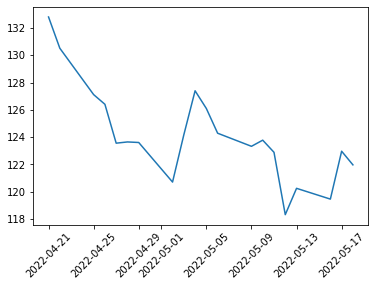

<Figure size 2880x1440 with 0 Axes>

In [26]:
plt.plot(data_train.iloc[1586:1606,1])
plt.xticks(rotation=45)
plt.figure(figsize = (40,20))
plt.tight_layout()

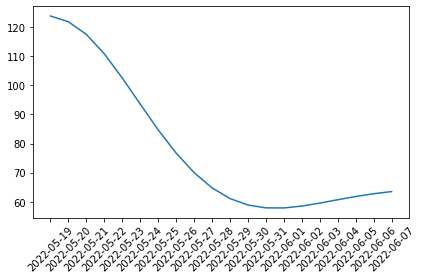

In [27]:
plt.plot(pred_df['pred_close'])
plt.xticks(rotation = 45)
plt.tight_layout()

In [29]:
pred_df.head()

,pred_close
Date,
2022-05-19,123.815865
2022-05-20,121.852562
2022-05-21,117.505486
2022-05-22,110.839081
2022-05-23,102.553543
